In [1]:
# Import neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the files

To read csv file, we can make use of the $pd.read\_csv()$ function. However, when loading the data it may be slightly different depending on your system distribution. In Linux, you can read it right way, in Windows will be necessary to add the separation format

In [2]:
path_file = './iuv_curico.csv' # Current directoty

# Load the data
# Linux case
# df = pd.read_csv(path_file)

# Windows
df = pd.read_csv(path_file, sep=';')
df.head()

,Fecha,Hora (UTC),IUV (indice)
0,01-01-2023,10:00,0.05
1,01-01-2023,11:00,0.52
2,01-01-2023,12:00,1.18
3,01-01-2023,13:00,3.37
4,01-01-2023,14:00,8.30


The current name of the columns difficult working with the dataset in pandas. To address this in general you can make use of the function below (and update it however you please). I also updated the date format in order to be more useful with pandas.

In [3]:
def read_file(path, col_names=['Date', 'Hour', 'IUV']):
    df = pd.read_csv(path, sep=';', parse_dates=['Fecha'], dayfirst=True)
    df.columns = col_names

    return df

iuv_curi = read_file(path_file)
iuv_curi.head()

,Date,Hour,IUV
0,2023-01-01,10:00,0.05
1,2023-01-01,11:00,0.52
2,2023-01-01,12:00,1.18
3,2023-01-01,13:00,3.37
4,2023-01-01,14:00,8.30


# Get info from dataset and visualize it

Pandas provides a lot of interesting internal functions that help out in the comprehension of the dataset. Such as $.info()$ and $.describe()$

In [4]:
iuv_curi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    412 non-null    datetime64[ns]
 1   Hour    412 non-null    object        
 2   IUV     412 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 9.8+ KB


In [5]:
iuv_curi.describe()

,IUV
count,412.000000
mean,5.580340
std,4.479279
min,0.010000
25%,1.380000
50%,4.545000
75%,9.785000
max,13.770000


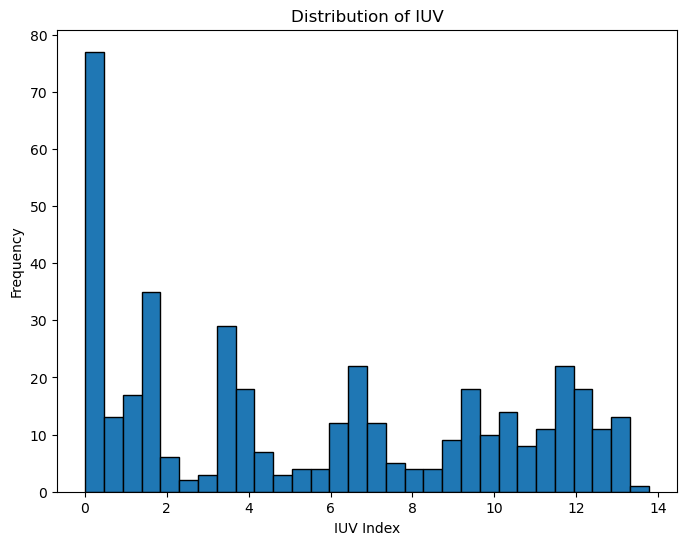

In [6]:
iuv_curi['IUV'].plot.hist(bins=30, edgecolor='black', figsize=(8, 6))
plt.xlabel('IUV Index')
plt.ylabel('Frequency')
plt.title('Distribution of IUV')
plt.show()


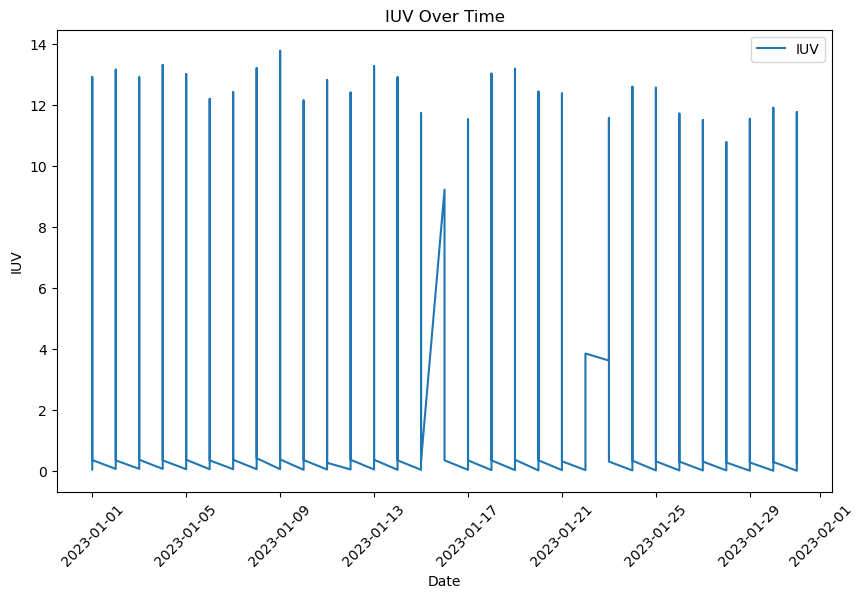

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(iuv_curi['Date'], iuv_curi['IUV'], label='IUV')
ax.set_xlabel('Date')
ax.set_ylabel('IUV')
ax.set_title('IUV Over Time')
ax.legend()
plt.xticks(rotation=45)
plt.show()


Through the homework you'll have to work with the dates, so, something that may come in handy is to use pandas notation to handle it. For example, we can easily plot the daily IUV mean: 

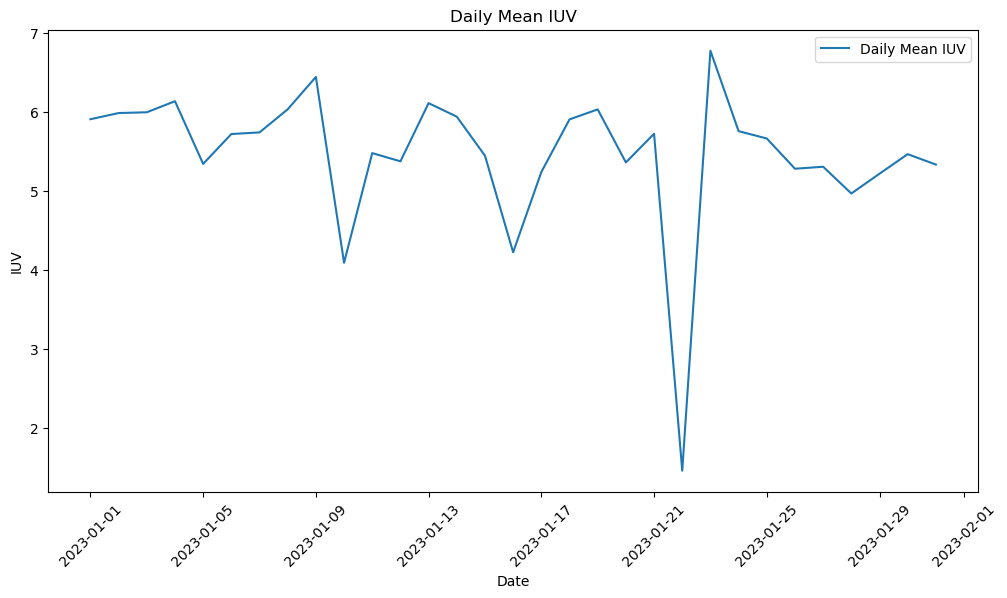

In [8]:
_iuv_curi = iuv_curi.copy()

# Convert the 'Date' column to a datetime object, one that pandas recognices
_iuv_curi['Date'] = pd.to_datetime(_iuv_curi['Date'])

# Set 'Date' as the DataFrame's index
_iuv_curi.set_index('Date', inplace=True)

# Resample to daily data and calculate the mean IUV index
daily_mean = _iuv_curi['IUV'].resample('D').mean()

# Plot the daily mean
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(daily_mean.index, daily_mean.values, label='Daily Mean IUV')
ax.set_xlabel('Date')
ax.set_ylabel('IUV')
ax.set_title('Daily Mean IUV')
ax.legend()
plt.xticks(rotation=45)
plt.show()


You can also include more months, in order to have more robust data. Also you can add more features to your data. Beware that, in this case, for other features, you may want to work with them in different dataframes, as the number of rows will very likely differ from feature to feature.

Again, I highly recommend you to practice playing around with the data and pandas, in order to get use to it.